In [1]:
import os

from matplotlib import pyplot as plt
import numpy as np
import xarray as xr

## Comparing FeSedFlux

In [2]:
ds_fesed_python = xr.open_dataset('fesedflux_gx1v7_CESM2_ecos1.1_2024.nc')
ds_fesed_idl = xr.open_dataset(os.path.join(os.sep,
                                            'glade',
                                            'work',
                                            'mlevy',
                                            'cesm_inputdata',
                                            'inputs_for_fe_forcing',
                                            'idl_testing',
                                            'fesedflux_gx1v6_CESM2_ecos1.1_2024.nc'
                                           )
                              )

In [3]:
# Compare to Jun's file
ds_jun_fesed = xr.open_dataset(os.path.join(os.sep,
                                            'glade',
                                            'work',
                                            'junyu',
                                            'updated_iron_forcing_gx1v6_CESM2_ecos1.1_2024',
                                            'fesedflux_gx1v6_CESM2_ecos1.1_2024.nc'))

In [4]:
def compare2(da1, da2, label1, label2, z1="z", z2="z"):
    first_different_lev = -1
    diff = xr.zeros_like(da1)
    diff.data = np.abs(da1.data - da2.data)
    for lev in range(60):
        if diff.isel({z1: lev}).max().data > 2e-6:
            print(f"[lev = {lev}] {label1} max: {da1.isel({z1: lev}).max().data}")
            print(f"[lev = {lev}] {label2} max: {da2.isel({z2: lev}).max().data}")
            if first_different_lev == -1:
                first_different_lev = lev
        if diff.isel({z1: lev}).max().data > 0:
            print(f"[lev = {lev}] Max diff: {diff.isel({z1: lev}).max().data}")
            print('---')
    print(f"Max diff [full column]: {diff.max().data}")
    if first_different_lev > -1:
        diff.isel(z=first_different_lev).plot()
        plt.title(f'Differences at level {first_different_lev}')

In [5]:
compare2(ds_fesed_idl['FESEDFLUXIN'], ds_fesed_python['FESEDFLUXIN'], "My IDL", "My python", z2="z_t")

Max diff [full column]: 0.0


[lev = 0] My IDL max: 0.002439741510897875
[lev = 0] Jun's IDL max: 0.002439741510897875
[lev = 0] Max diff: 0.0006163878133520484
---
[lev = 1] My IDL max: 0.002439741510897875
[lev = 1] Jun's IDL max: 0.002439741510897875
[lev = 1] Max diff: 0.000500452471897006
---
[lev = 2] My IDL max: 0.029276899993419647
[lev = 2] Jun's IDL max: 0.029276899993419647
[lev = 2] Max diff: 0.005207687150686979
---
[lev = 3] My IDL max: 0.029276899993419647
[lev = 3] Jun's IDL max: 0.029276899993419647
[lev = 3] Max diff: 0.003159483429044485
---
[lev = 4] My IDL max: 0.026615362614393234
[lev = 4] Jun's IDL max: 0.026615362614393234
[lev = 4] Max diff: 0.004599103704094887
---
[lev = 5] My IDL max: 0.02092701569199562
[lev = 5] Jun's IDL max: 0.020570000633597374
[lev = 5] Max diff: 0.004641054198145866
---
[lev = 6] My IDL max: 0.026464279741048813
[lev = 6] Jun's IDL max: 0.025293324142694473
[lev = 6] Max diff: 0.006182174663990736
---
[lev = 7] My IDL max: 0.02091207168996334
[lev = 7] Jun's IDL 

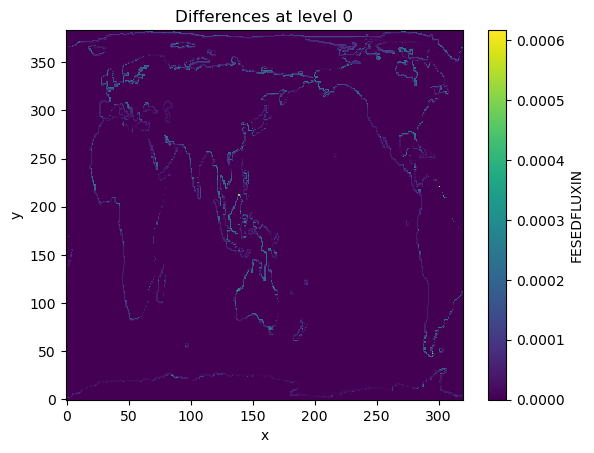

In [6]:
compare2(ds_fesed_idl['FESEDFLUXIN'], ds_jun_fesed['FESEDFLUXIN'], "My IDL", "Jun's IDL")

## Comparing FeSedRedFlux

In [7]:
ds_fesedred_python = xr.open_dataset('fesedfluxRed_gx1v7_CESM2_ecos1.1_2024.nc')
ds_fesedred_idl = xr.open_dataset(os.path.join(os.sep,
                                               'glade',
                                               'work',
                                               'mlevy',
                                               'cesm_inputdata',
                                               'inputs_for_fe_forcing',
                                               'idl_testing',
                                               'fesedfluxRed_gx1v6_CESM2_ecos1.1_2024.nc'
                                              )
                                 )

In [8]:
compare2(ds_fesedred_idl['FESEDFLUXIN'], ds_fesedred_python['FESEDFLUXIN'], "My IDL", "My python", z2="z_t")

[lev = 0] Max diff: 2.9802322387695312e-08
---
[lev = 1] Max diff: 5.960464477539063e-08
---
[lev = 2] Max diff: 1.430511474609375e-06
---
[lev = 3] Max diff: 1.430511474609375e-06
---
[lev = 4] Max diff: 1.430511474609375e-06
---
[lev = 5] Max diff: 1.9073486328125e-06
---
[lev = 6] Max diff: 9.5367431640625e-07
---
[lev = 7] Max diff: 7.152557373046875e-07
---
[lev = 8] Max diff: 7.152557373046875e-07
---
[lev = 9] Max diff: 7.152557373046875e-07
---
[lev = 10] Max diff: 7.152557373046875e-07
---
[lev = 11] Max diff: 4.76837158203125e-07
---
[lev = 12] Max diff: 4.76837158203125e-07
---
[lev = 13] Max diff: 2.384185791015625e-07
---
[lev = 14] Max diff: 4.76837158203125e-07
---
[lev = 15] Max diff: 4.76837158203125e-07
---
[lev = 16] Max diff: 1.7881393432617188e-07
---
[lev = 17] Max diff: 1.1920928955078125e-07
---
[lev = 18] Max diff: 2.384185791015625e-07
---
[lev = 19] Max diff: 1.1920928955078125e-07
---
[lev = 20] Max diff: 9.5367431640625e-07
---
[lev = 21] Max diff: 1.192092

### Aux Variables

Dumping out local_speed and Kd for additional comparisons

In [ ]:
ds_python_speed = xr.open_dataset('my_speed.nc')
ds_python_Kd = xr.open_dataset('my_Kd.nc')

In [ ]:
ds_idl_speed = xr.open_dataset(os.path.join(os.sep,
                                            'glade',
                                            'work',
                                            'mlevy',
                                            'cesm_inputdata',
                                            'inputs_for_fe_forcing',
                                            'idl_testing',
                                            'speed.nc'
                                           )
                              )

ds_idl_Kd = xr.open_dataset(os.path.join(os.sep,
                                         'glade',
                                         'work',
                                         'mlevy',
                                         'cesm_inputdata',
                                         'inputs_for_fe_forcing',
                                         'idl_testing',
                                         'Kd.nc'
                                        )
                           )


In [ ]:
compare2(ds_idl_speed['SPEED'], ds_python_speed['speed'], "My IDL", "My python", z2="z_t")

In [ ]:
compare2(ds_idl_Kd['KD'], ds_python_Kd['Kd'], "My IDL", "My python", z2="z_w_bot")

In [ ]:
np.nanmax(np.abs(ds_idl_Kd['KD'].isel(z=2).data - ds_python_Kd['Kd'].isel(z_w_bot=2).data))

In [ ]:
diff = xr.zeros_like(ds_idl_Kd['KD'].isel(z=2))
diff.data = np.abs(ds_idl_Kd['KD'].isel(z=2).data - ds_python_Kd['Kd'].isel(z_w_bot=2).data)
diff.plot()

In [ ]:
ds_idl_Kd['KD'].isel(z=2).plot()

In [ ]:
ds_python_Kd['Kd'].isel(z_w_bot=2).plot()

In [ ]:
def report_diff(da1, da2):
    diff = np.abs(da1.data - da2.data)
    max_diff = np.max(diff)
    itemindex = np.where(diff == max_diff)
    return itemindex

In [ ]:
report_diff(ds_idl_speed['SPEED'].isel(z=40), ds_python_speed['speed'].isel(z_t=40))

In [ ]:
ds_idl_speed['SPEED'].isel(x=217,y=5,z=40).data

In [ ]:
ds_python_speed['speed'].isel(nlon=217,nlat=5,z_t=40).data

In [ ]:
report_diff(ds_idl_speed['SPEED'].isel(z=-1), ds_python_speed['speed'].isel(z_t=-1))

In [ ]:
ds_idl_speed['SPEED'].isel(x=193,y=214).data

In [ ]:
ds_python_speed['speed'].isel(nlon=193,nlat=214).data

In [ ]:
inputdir = os.path.join(os.path.sep,
                        'glade',
                        'work',
                        'mlevy',
                        'cesm_inputdata',
                        'inputs_for_fe_forcing',
                       )
var_list = ['POC_FLUX_IN', 'UVEL', 'VVEL', 'KVMIX', 'TEMP', 'KMT']

vars_in = xr.open_dataset(os.path.join(inputdir, 'JAMES_8p4z_last20yr_annual_mean.nc'))[var_list].squeeze()

In [ ]:
vars_in['KMT'].isel(nlon=193,nlat=214).data

In [ ]:
velocity = xr.zeros_like(vars_in['UVEL'])
velocity.data = np.abs(vars_in['UVEL']) + np.abs(vars_in['VVEL'])
velocity.isel(nlon=193,nlat=214).data